# Visualising climate change in India

In this vignette, we demonstrate the use of varunayan for visualizsing the change in average temeperatre from 1941 to 2024.


In [1]:
import varunayan

df = varunayan.era5ify_geojson(
    request_id="temp_india_yearly",
    variables=["2m_temperature"],
    start_date="1941-1-1",
    end_date="2024-12-31",
    json_file="../data/india.json",
    frequency="yearly",
)


STARTING ERA5 SINGLE LEVEL PROCESSING
Request ID: temp_india_yearly
Variables: ['2m_temperature']
Date Range: 1941-01-01 to 2024-12-31
Frequency: yearly
Resolution: 0.25°
GeoJSON File: C:\Users\ATHARV~1\AppData\Local\Temp\temp_india_yearly_temp_geojson.json


--- GeoJSON Mini Map ---

MINI MAP (68.18°W to 97.40°E, 7.97°S to 35.49°N):
┌─────────────────────────────────────────┐
│·········································│
│········■■■■■■■··························│
│··········■■■■■··························│
│·········■■■■■■■·························│
│·······■■■■■■■■■■························│
│····■■■■■■■■■■■■■■■■········■····■■■■■■■·│
│···■■■■■■■■■■■■■■■■■■■■■■■■■·■■■■■■■■····│
│····■■■■■■■■■■■■■■■■■■■■■■■■·····■■■■····│
│·■■■■■■■■■■■■■■■■■■■■■■■■■■■■···■■■······│
│··■■■■■■■■■■■■■■■■■■■■■■■■■■■············│
│·······■■■■■■■■■■■■■■■■■■■···············│
│·······■■■■■■■■■■■■■■■■··················│
│·······■■■■■■■■■■■■■·····················│
│········■■■■■■■■■························│
│··

11816a5996f2ad50a927f9c906761429.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

e0a0ebf7450e58d35c26985e9ffdf5d2.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

684289f83f9ec5a445f2777d12466f59.zip:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

412b00c7f5eee84fe077883928bc2829.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

435c337616af70ed2ba0251618388fdd.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

c03c5d2fe3a0462c9c84d90e39f9a850.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

cd6900b6c23a704f4e7066e4233b5242.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

9d5648bc4e64a705ffab07909854d4a6.zip:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

d5e88404acc5259c4dec5904a8b420ef.zip:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

316b09b4161591ccc0a3a1ac059b2348.zip:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

f81da4a5487d6f886abf9d3c3b5aedac.zip:   0%|          | 0.00/195k [00:00<?, ?B/s]


Saving files to output directory: temp_india_yearly_output
  Saved final data to: temp_india_yearly_output\temp_india_yearly_yearly_data.csv
  Saved unique coordinates to: temp_india_yearly_output\temp_india_yearly_unique_latlongs.csv
  Saved raw data to: temp_india_yearly_output\temp_india_yearly_raw_data.csv

PROCESSING COMPLETE

RESULTS SUMMARY:
----------------------------------------
Variables processed: 1
Time period:         1941-01-01 to 2024-12-31
Final output shape:  (84, 2)
Total complete processing time: 286.78 seconds

First 5 rows of aggregated data:
          t2m  year
0  296.386200  1941
1  296.234344  1942
2  295.743408  1943
3  296.361176  1944
4  296.111603  1945

ERA5 SINGLE LEVEL PROCESSING COMPLETED SUCCESSFULLY


In [2]:
mean_t2m = df["t2m"].mean()

df["dev"] = df["t2m"] - mean_t2m

df.head()

,t2m,year,dev
0,296.386200,1941,-0.202301
1,296.234344,1942,-0.354156
2,295.743408,1943,-0.845093
3,296.361176,1944,-0.227325
4,296.111603,1945,-0.476898


In [3]:
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt


def setup_matplotlib():
    plt.rcParams["figure.dpi"] = 300
    plt.rcParams["savefig.dpi"] = 300
    plt.rcParams["font.family"] = "sans-serif"
    plt.rcParams["font.sans-serif"] = ["Arial"]
    plt.rcParams["axes.labelweight"] = "normal"

    plt.rcParams["mathtext.fontset"] = "custom"
    plt.rcParams["mathtext.rm"] = "Arial"
    plt.rcParams["mathtext.it"] = "Arial:italic"
    plt.rcParams["mathtext.bf"] = "Arial:bold"


setup_matplotlib()

In [4]:
norm = mcolors.Normalize(vmin=df["dev"].min(), vmax=df["dev"].max())

In [5]:
cmap = plt.colormaps["coolwarm"]

In [6]:
colors = cmap(norm(df["dev"]))

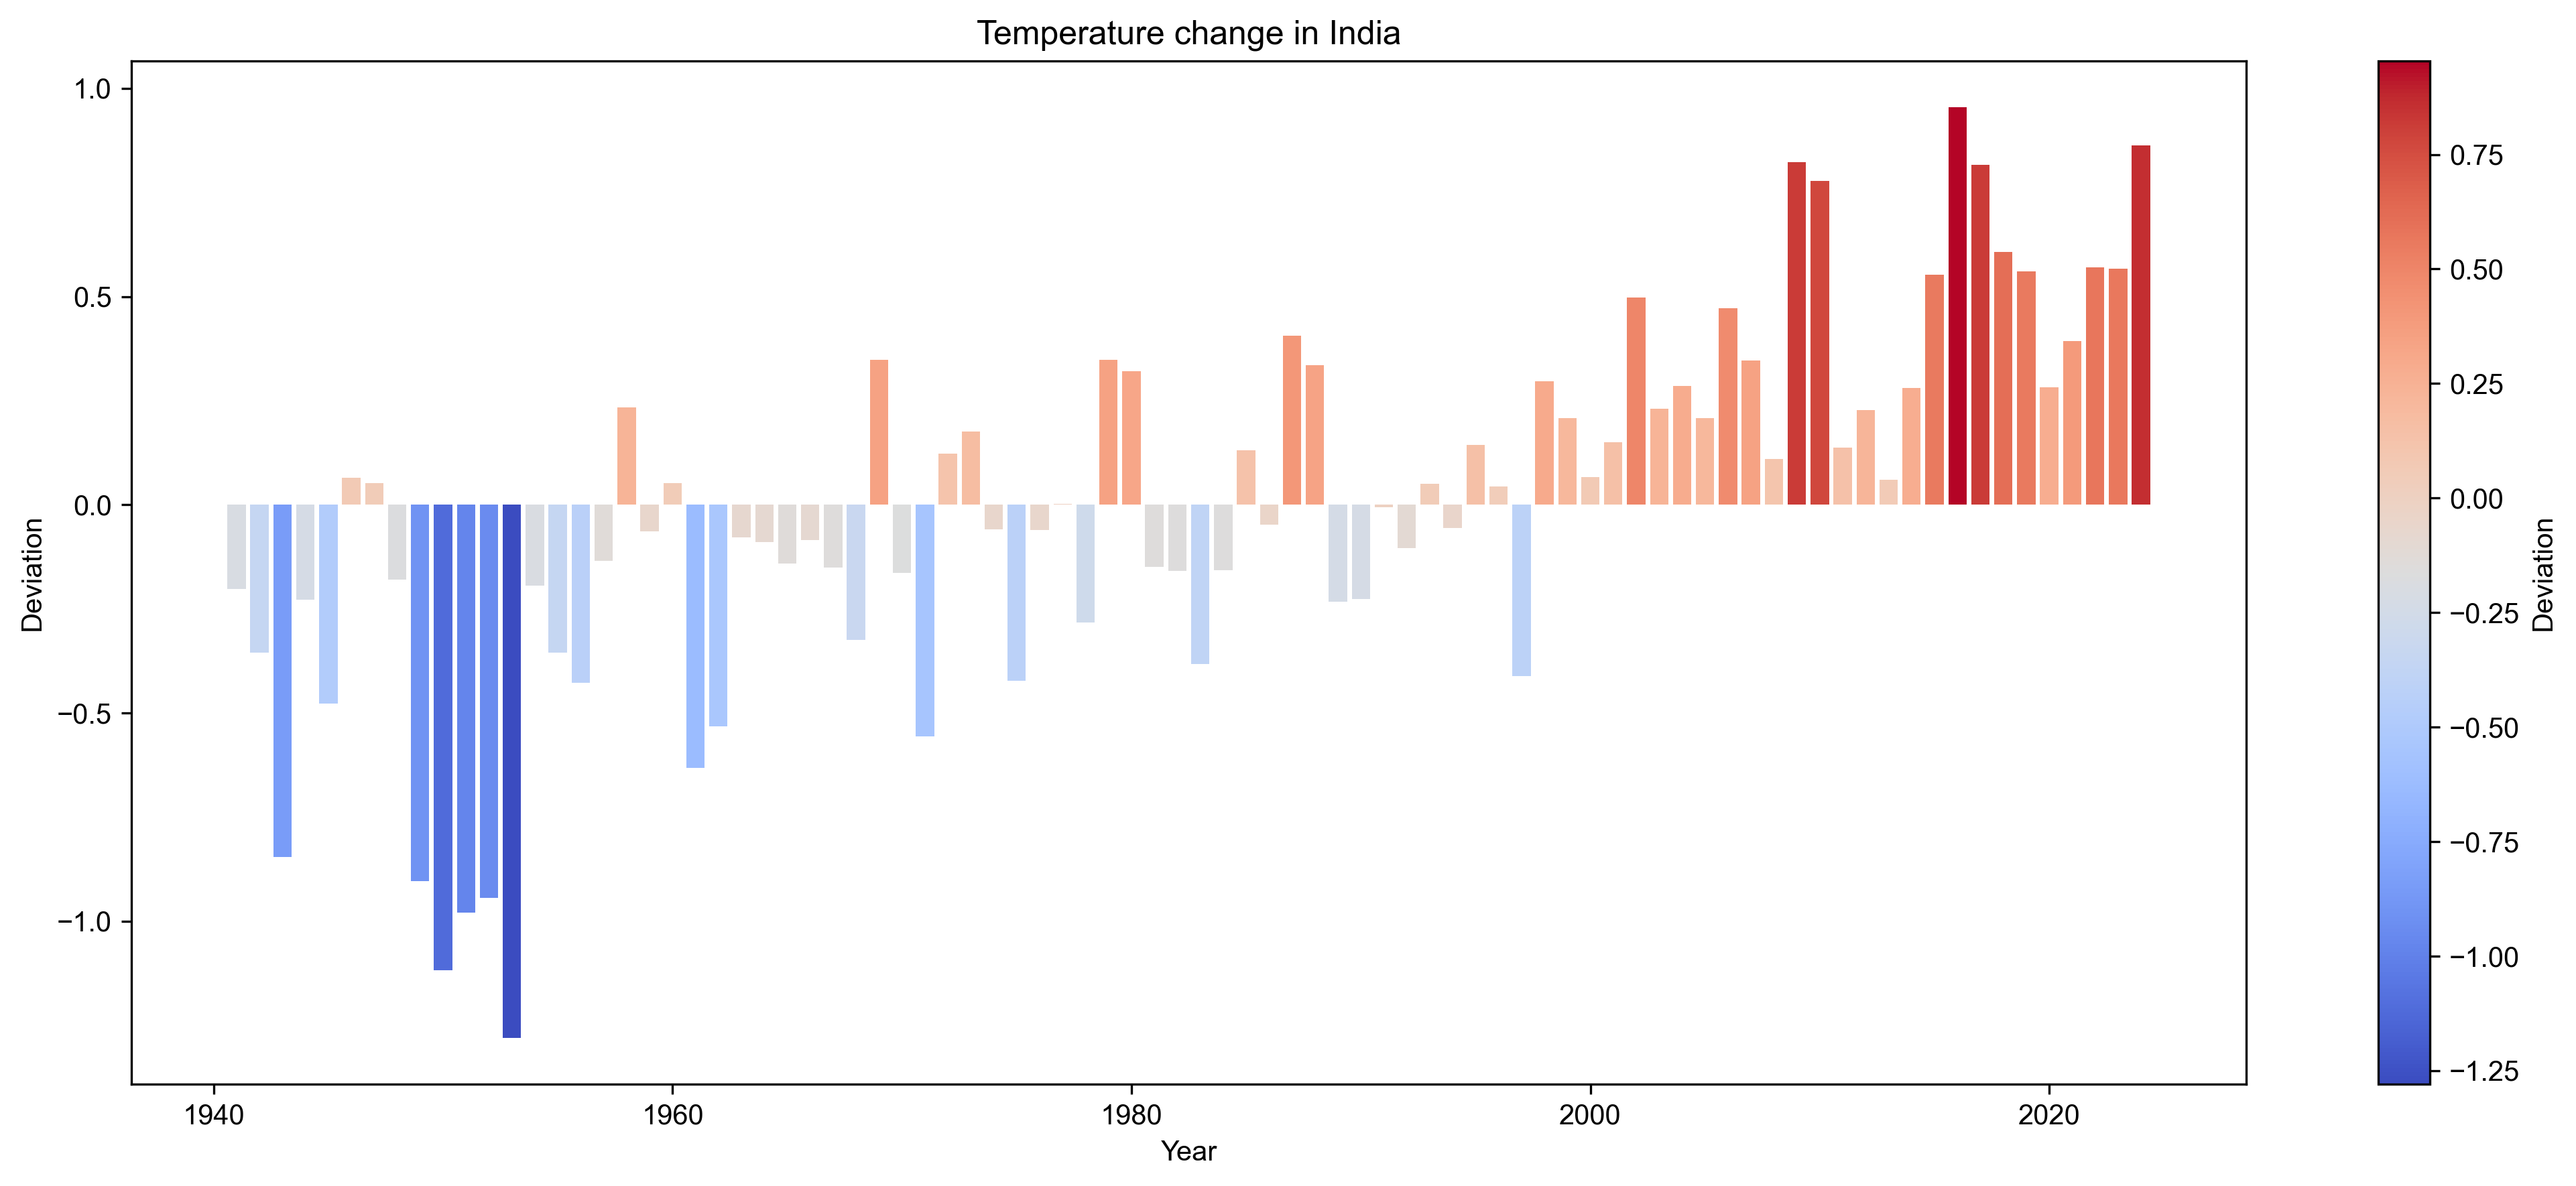

In [7]:
fig, ax = plt.subplots(figsize=(14, 6))
bars = ax.bar(df["year"], df["dev"], color=colors)

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array(df["dev"].values)

cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Deviation")

ax.set_xlabel("Year")
ax.set_ylabel("Deviation")
ax.set_title("Temperature change in India")

plt.tight_layout()
plt.show()